# Python機器學習與深度學習入門 
## Q9-1 ：CNN圖片辨識
## by R07522717 林温雅

`Package`

使用gpu版本tensorflow稍微加速，先確定有沒有使用到gpu（雖然老舊筆電上GPU也稱不上堪用...）

In [1]:
import tensorflow as tf

In [2]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
tf.test.is_gpu_available()

True

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/cpu:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6168024053640763881, name: "/gpu:0"
 device_type: "GPU"
 memory_limit: 209510400
 locality {
   bus_id: 1
 }
 incarnation: 1530698153841425601
 physical_device_desc: "device: 0, name: GeForce GT 750M, pci bus id: 0000:01:00.0"]

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# Keras functions
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPool2D
from keras.optimizers import SGD
# Keras dataset
from keras.datasets import mnist
# Keras utils
from keras.utils import np_utils

Using TensorFlow backend.


`load進資料`

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

`資料reshape、正規化、1-hot encoding`

In [6]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test = (x_test - x_test.min()) / (x_test.max() - x_test.min())

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

`建立model`

經過一些測試，決定模型長相

In [7]:
model = Sequential()

model.add(Conv2D(1, (3, 3), padding='same', input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(4, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(8, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(50))
model.add(Activation('relu'))

model.add(Dense(25))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='kullback_leibler_divergence', optimizer=SGD(lr=0.1), metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 1)         10        
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 1)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 2)         20        
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 2)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 2)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 4)           76        
__________

`Fit!`

In [8]:
%%time
%%capture
model_history = model.fit(x_train, y_train, batch_size=128, epochs=30, 
                          validation_data = (x_test, y_test), verbose = 2,
                          shuffle = True)

CPU times: user 3min 37s, sys: 27.3 s, total: 4min 4s
Wall time: 3min 19s


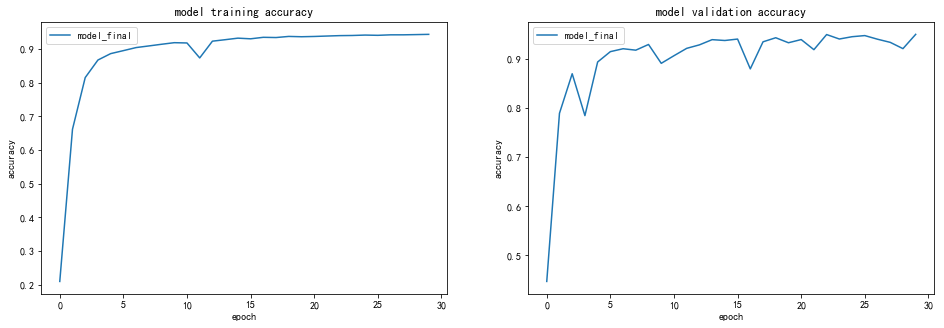

In [9]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1,2,1)
plt.plot(model_history.history["acc"])

plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_final"], loc = "best")

ax2 = fig.add_subplot(1,2,2)
plt.plot(model_history.history["val_acc"])

plt.title("model validation accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_final"], loc = "best")

plt.show()

In [10]:
max_acc = max(model_history.history["acc"])
max_index = model_history.history["acc"].index(max_acc)
max_valacc = max(model_history.history["val_acc"])
max_valindex = model_history.history["val_acc"].index(max_valacc)
print(f'最高training accuracy： {max_acc}\n發生在epoch = {max_index}')
print(f'最高validation accuracy： {max_valacc}\n發生在epoch = {max_valindex}')

最高training accuracy： 0.9438833333651224
發生在epoch = 29
最高validation accuracy： 0.9502
發生在epoch = 29


In [11]:
score = model.evaluate(x_test, y_test, batch_size=10000)
print("Loss: %f" %score[0])
print("testing accuracy: %f" %(score[1]*100))

10000/10000 [==============================] - 4s
Loss: 0.161531
testing accuracy: 95.020014
